[Reference](https://medium.com/@nomannayeem/comprehensive-guide-to-time-series-data-analytics-and-forecasting-with-python-2c82de2c8517)

In [1]:
import pandas as pd
import numpy as np

# Creating a sample time series data
date_range = pd.date_range(start='1/1/2020', periods=100, freq='D')
data = np.random.randn(100)
time_series = pd.Series(data, index=date_range)

print(time_series.head())

2020-01-01   -0.323809
2020-01-02    0.588922
2020-01-03   -0.025100
2020-01-04    1.551581
2020-01-05    0.476322
Freq: D, dtype: float64


# Preprocessing Time Series Data

In [6]:
# Handling missing values
time_series_with_nan = time_series.copy()
time_series_with_nan[::10] = np.nan  # Introducing missing values

# Forward fill method
time_series_filled = time_series_with_nan.fillna(method='ffill').dropna()

# Detecting and removing outliers using Z-score
from scipy.stats import zscore
z_scores = zscore(time_series_filled)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)  # Z-score threshold
time_series_no_outliers = time_series_filled[filtered_entries]

<ipython-input-6-93c3702942c2>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_filled = time_series_with_nan.fillna(method='ffill').dropna()


In [9]:
# Moving average smoothing
moving_avg = time_series_no_outliers.rolling(window=5).mean()

# Differencing
differenced_series = time_series_no_outliers.diff().dropna()

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_series = scaler.fit_transform(time_series_no_outliers.values.reshape(-1, 1))

# Exploratory Data Analysis (EDA)

<ipython-input-10-d5107e0d8c1f>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series = time_series.fillna(method='ffill')


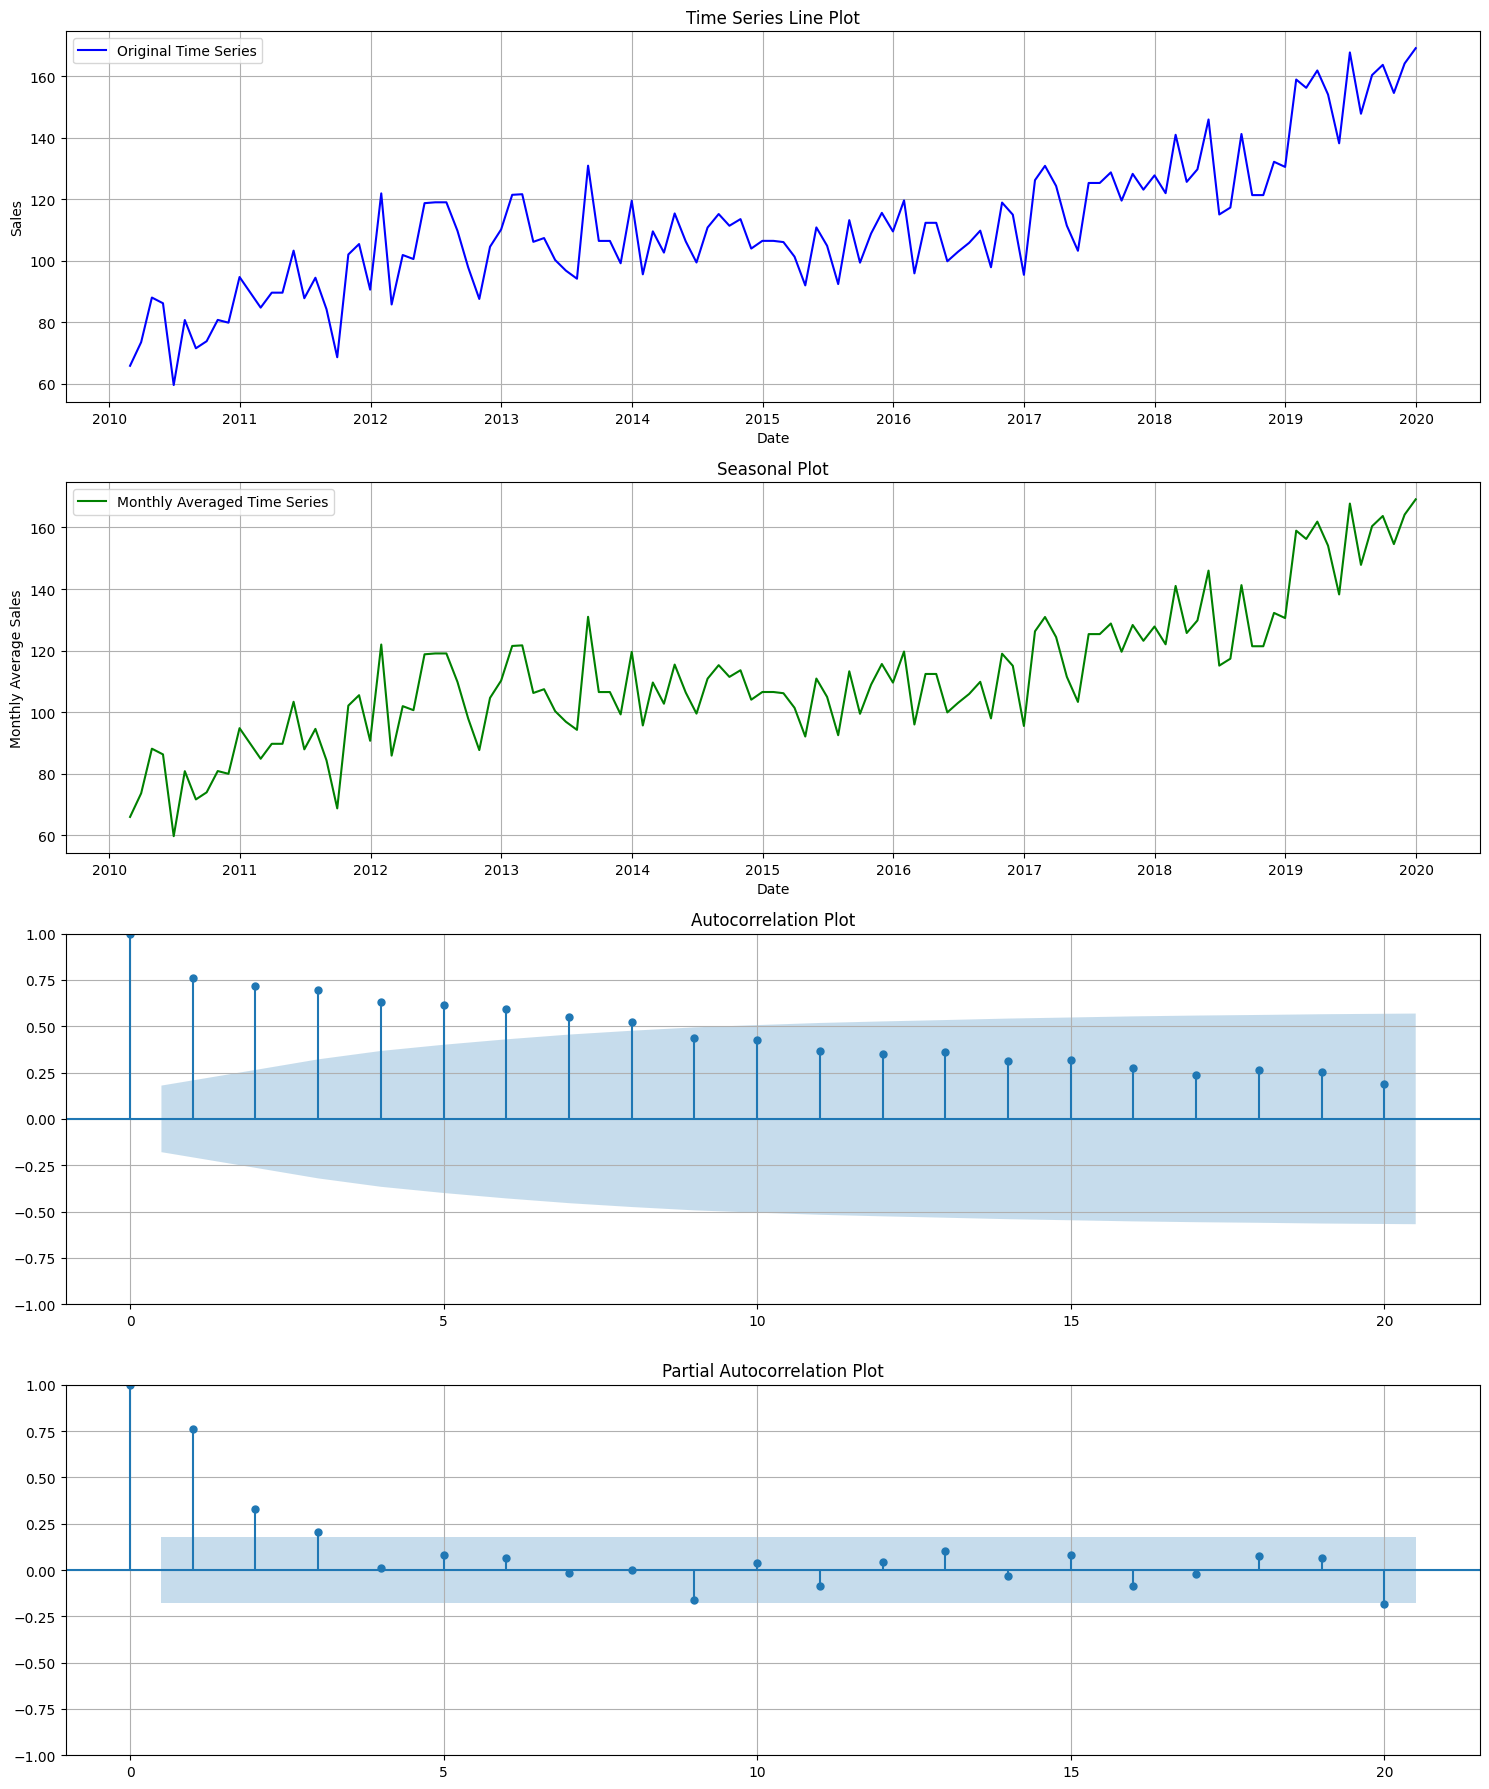

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# I am Creating a realistic dummy time series dataset (e.g., monthly sales data over 10 years) to display the code execution
np.random.seed(0)
date_range = pd.date_range(start='1/1/2010', periods=120, freq='M')
trend = np.linspace(50, 150, 120)  # Linear trend
seasonality = 10 + 20 * np.sin(np.linspace(0, 3.14 * 2, 120))  # Seasonal component
noise = np.random.normal(scale=10, size=120)  # Random noise
data = trend + seasonality + noise
time_series = pd.Series(data, index=date_range)

# Handle missing values (if any)
time_series[::15] = np.nan
time_series = time_series.fillna(method='ffill')

# Moving average smoothing
moving_avg = time_series.rolling(window=12).mean()

# Differencing
differenced_series = time_series.diff().dropna()

# Preparing the data for seasonal plot
time_series_monthly = time_series.resample('M').mean()

# Plotting
plt.figure(figsize=(15, 18))

# Line plot
plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original Time Series', color='blue')
plt.title('Time Series Line Plot')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Seasonal plot
plt.subplot(4, 1, 2)
plt.plot(time_series_monthly, label='Monthly Averaged Time Series', color='green')
plt.title('Seasonal Plot')
plt.xlabel('Date')
plt.ylabel('Monthly Average Sales')
plt.legend()
plt.grid(True)

# Autocorrelation plot
plt.subplot(4, 1, 3)
cleaned_time_series = time_series.dropna()
plot_acf(cleaned_time_series, lags=20, ax=plt.gca())
plt.title('Autocorrelation Plot')
plt.grid(True)

# Partial autocorrelation plot
plt.subplot(4, 1, 4)
plot_pacf(cleaned_time_series, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Plot')
plt.grid(True)

plt.tight_layout()
plt.savefig('./eda_visuals.png')
plt.show()

# Time Series Decomposition

<ipython-input-12-e349d5d1c937>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series = time_series.fillna(method='ffill')  # Forward fill missing values


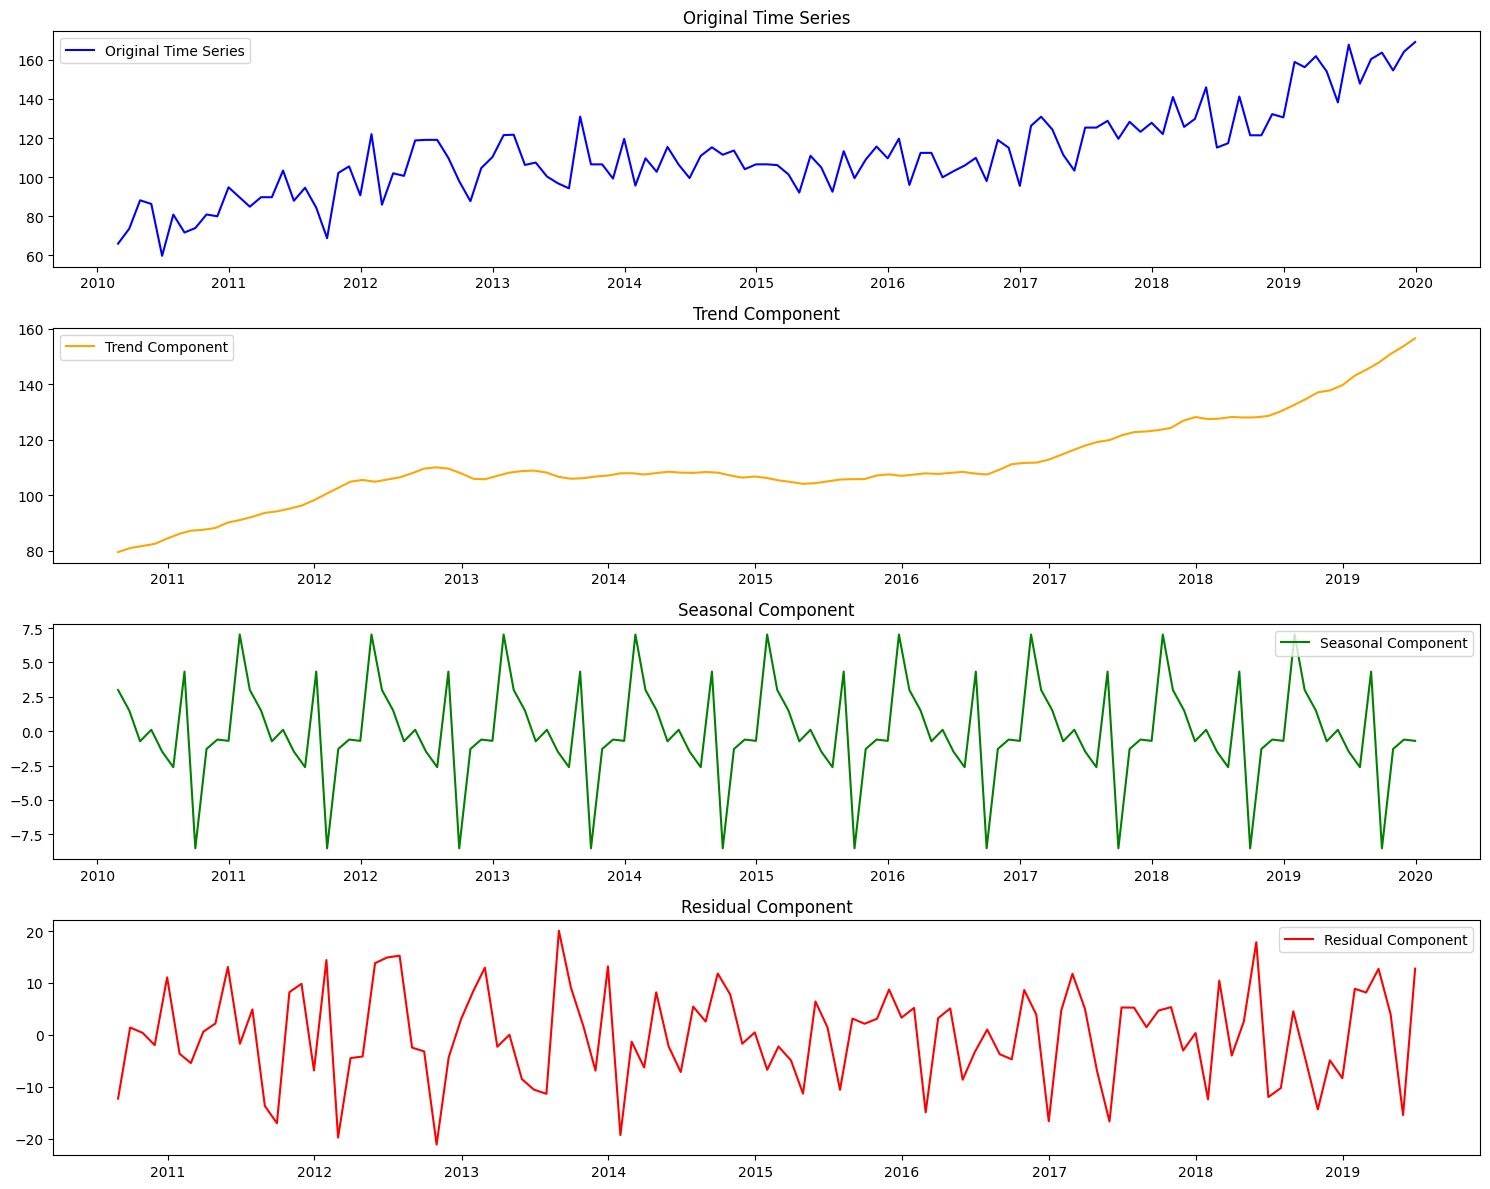

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Creating a realistic dummy time series dataset (e.g., monthly sales data over 10 years)
np.random.seed(0)
date_range = pd.date_range(start='1/1/2010', periods=120, freq='M')
trend = np.linspace(50, 150, 120)  # Linear trend
seasonality = 10 + 20 * np.sin(np.linspace(0, 3.14 * 2, 120))  # Seasonal component
noise = np.random.normal(scale=10, size=120)  # Random noise
data = trend + seasonality + noise
time_series = pd.Series(data, index=date_range)

# Handle missing values (if any)
time_series[::15] = np.nan
time_series = time_series.fillna(method='ffill')  # Forward fill missing values

# Ensure there are no remaining missing values
time_series = time_series.dropna()

# Decompose the time series
decomposition = seasonal_decompose(time_series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed components
plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original Time Series', color='blue')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()


plt.tight_layout()
plt.savefig('/time_series_decomposition.png')
plt.show()

# Time Series Forecasting Methods

<ipython-input-13-9bd8a0bc2670>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series = time_series.fillna(method='ffill')  # Forward fill missing values


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -454.542
Date:                Sun, 01 Sep 2024   AIC                            915.084
Time:                        02:30:53   BIC                            923.396
Sample:                    02-28-2010   HQIC                           918.459
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0353      0.127     -0.279      0.781      -0.284       0.213
ma.L1         -0.6797      0.097     -7.033      0.000      -0.869      -0.490
sigma2       129.0945     17.923      7.203      0.0

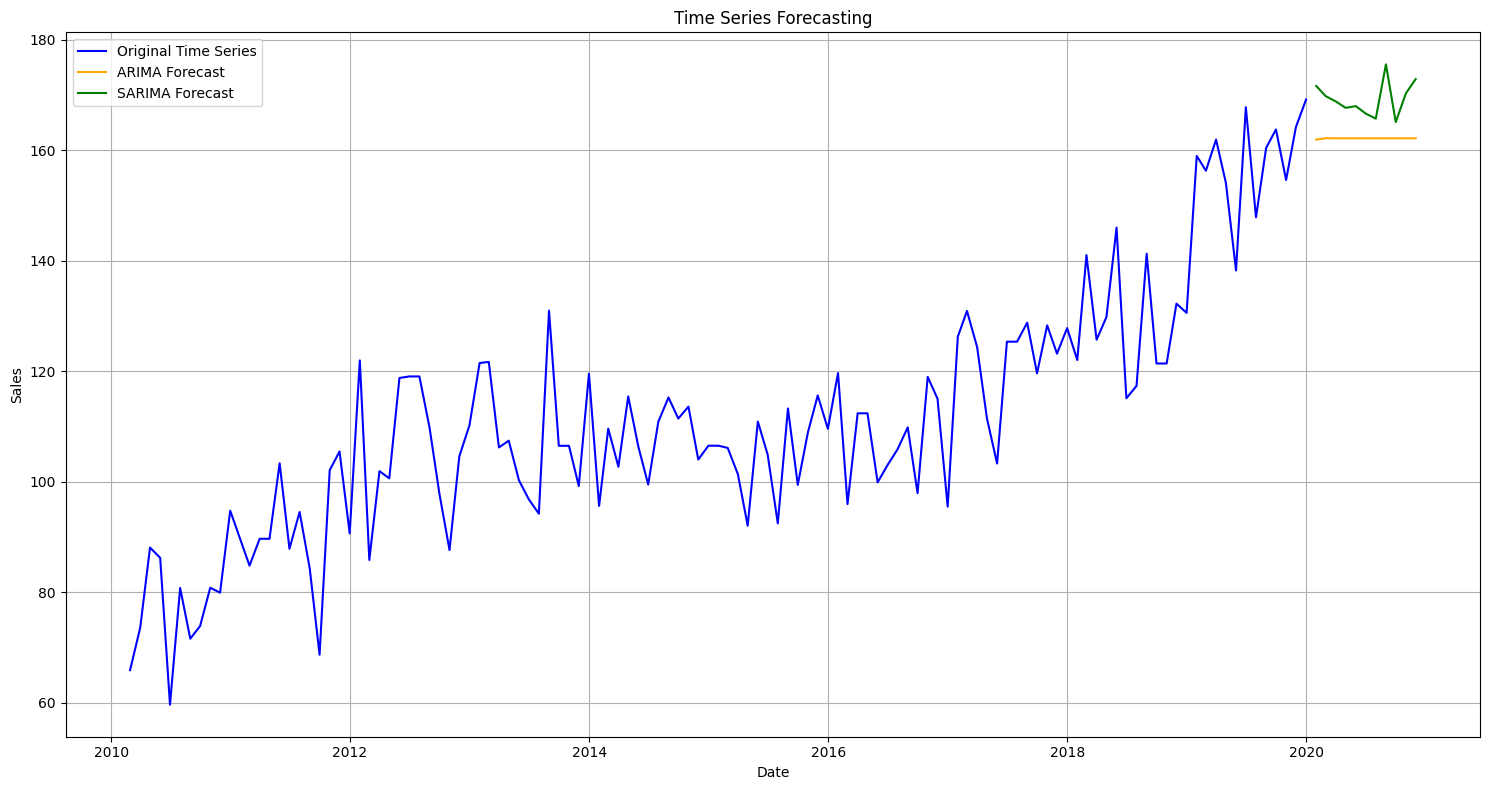

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Creating a realistic dummy time series dataset (e.g., monthly sales data over 10 years)
np.random.seed(0)
date_range = pd.date_range(start='1/1/2010', periods=120, freq='M')
trend = np.linspace(50, 150, 120)  # Linear trend
seasonality = 10 + 20 * np.sin(np.linspace(0, 3.14 * 2, 120))  # Seasonal component
noise = np.random.normal(scale=10, size=120)  # Random noise
data = trend + seasonality + noise
time_series = pd.Series(data, index=date_range)

# Handle missing values (if any)
time_series[::15] = np.nan
time_series = time_series.fillna(method='ffill')  # Forward fill missing values

# Ensure there are no remaining missing values
time_series = time_series.dropna()

# Fit ARIMA model
arima_model = ARIMA(time_series, order=(1, 1, 1))
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Fit SARIMA model
sarima_model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)
print(sarima_fit.summary())

# Forecasting with ARIMA
arima_forecast = arima_fit.get_forecast(steps=12)
arima_forecast_index = pd.date_range(start=time_series.index[-1], periods=12, freq='M')
arima_forecast_series = pd.Series(arima_forecast.predicted_mean, index=arima_forecast_index)

# Forecasting with SARIMA
sarima_forecast = sarima_fit.get_forecast(steps=12)
sarima_forecast_index = pd.date_range(start=time_series.index[-1], periods=12, freq='M')
sarima_forecast_series = pd.Series(sarima_forecast.predicted_mean, index=sarima_forecast_index)

# Plotting the original series and forecasts
plt.figure(figsize=(15, 8))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(arima_forecast_series, label='ARIMA Forecast', color='orange')
plt.plot(sarima_forecast_series, label='SARIMA Forecast', color='green')
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Evaluation and Selection

<ipython-input-14-80e50d294d85>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series = time_series.fillna(method='ffill')  # Forward fill missing values


ARIMA MAE: 6.740723562703853, MSE: 86.0571951925383, RMSE: 9.27670174105745, MAPE: nan
SARIMA MAE: 11.684140109331691, MSE: 195.51454887051844, RMSE: 13.982651710978088, MAPE: nan


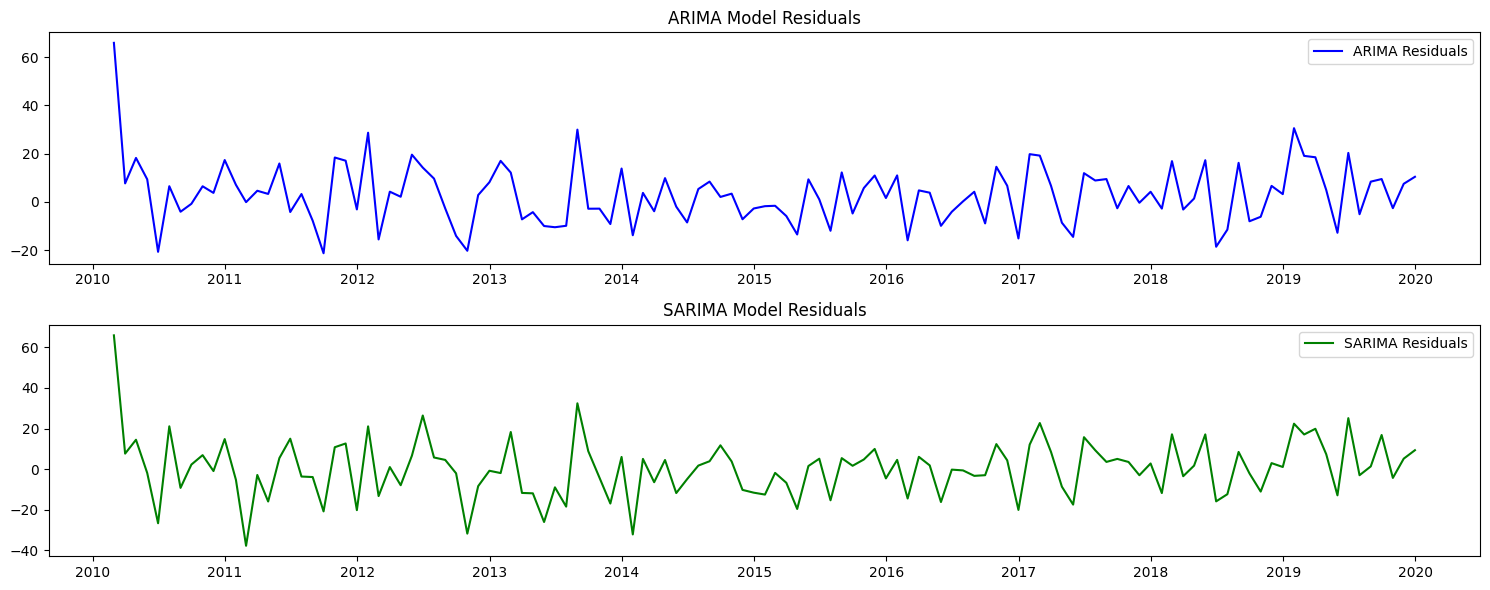

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Creating a realistic dummy time series dataset (e.g., monthly sales data over 10 years)
np.random.seed(0)
date_range = pd.date_range(start='1/1/2010', periods=120, freq='M')
trend = np.linspace(50, 150, 120)  # Linear trend
seasonality = 10 + 20 * np.sin(np.linspace(0, 3.14 * 2, 120))  # Seasonal component
noise = np.random.normal(scale=10, size=120)  # Random noise
data = trend + seasonality + noise
time_series = pd.Series(data, index=date_range)

# Handle missing values (if any)
time_series[::15] = np.nan
time_series = time_series.fillna(method='ffill')  # Forward fill missing values

# Ensure there are no remaining missing values
time_series = time_series.dropna()

# Fit ARIMA model
arima_model = ARIMA(time_series, order=(1, 1, 1))
arima_fit = arima_model.fit()

# Fit SARIMA model
sarima_model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecasting with ARIMA
arima_forecast = arima_fit.get_forecast(steps=12)
arima_forecast_series = arima_forecast.predicted_mean
arima_forecast_ci = arima_forecast.conf_int()

# Forecasting with SARIMA
sarima_forecast = sarima_fit.get_forecast(steps=12)
sarima_forecast_series = sarima_forecast.predicted_mean
sarima_forecast_ci = sarima_forecast.conf_int()

# Evaluation metrics
actual = time_series[-12:]

# ARIMA evaluation
arima_mae = mean_absolute_error(actual, arima_forecast_series[:12])
arima_mse = mean_squared_error(actual, arima_forecast_series[:12])
arima_rmse = np.sqrt(arima_mse)
arima_mape = np.mean(np.abs((actual - arima_forecast_series[:12]) / actual)) * 100

# SARIMA evaluation
sarima_mae = mean_absolute_error(actual, sarima_forecast_series[:12])
sarima_mse = mean_squared_error(actual, sarima_forecast_series[:12])
sarima_rmse = np.sqrt(sarima_mse)
sarima_mape = np.mean(np.abs((actual - sarima_forecast_series[:12]) / actual)) * 100

print(f"ARIMA MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}, MAPE: {arima_mape}")
print(f"SARIMA MAE: {sarima_mae}, MSE: {sarima_mse}, RMSE: {sarima_rmse}, MAPE: {sarima_mape}")

# Plotting the residuals
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(arima_fit.resid, label='ARIMA Residuals', color='blue')
plt.title('ARIMA Model Residuals')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sarima_fit.resid, label='SARIMA Residuals', color='green')
plt.title('SARIMA Model Residuals')
plt.legend()

plt.tight_layout()
plt.savefig('./model_evaluation_residuals.png')
plt.show()

<ipython-input-15-072a23ef1592>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series = time_series.fillna(method='ffill')


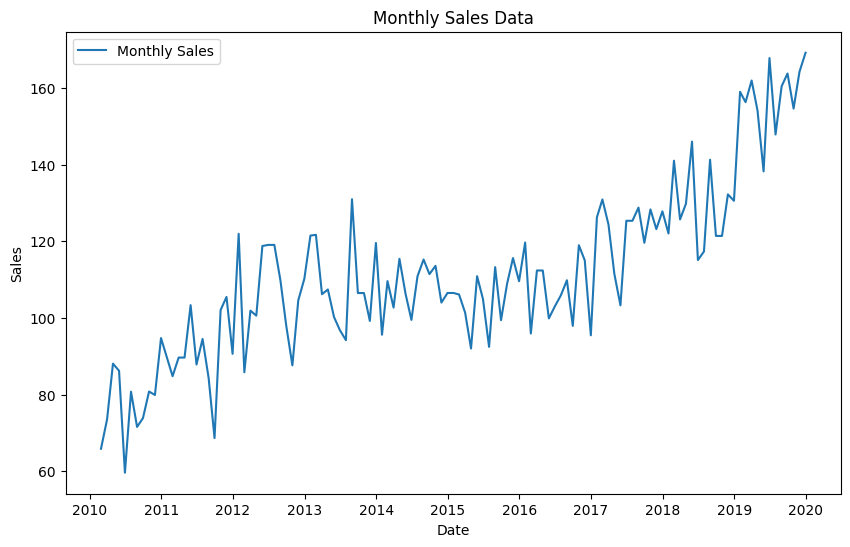

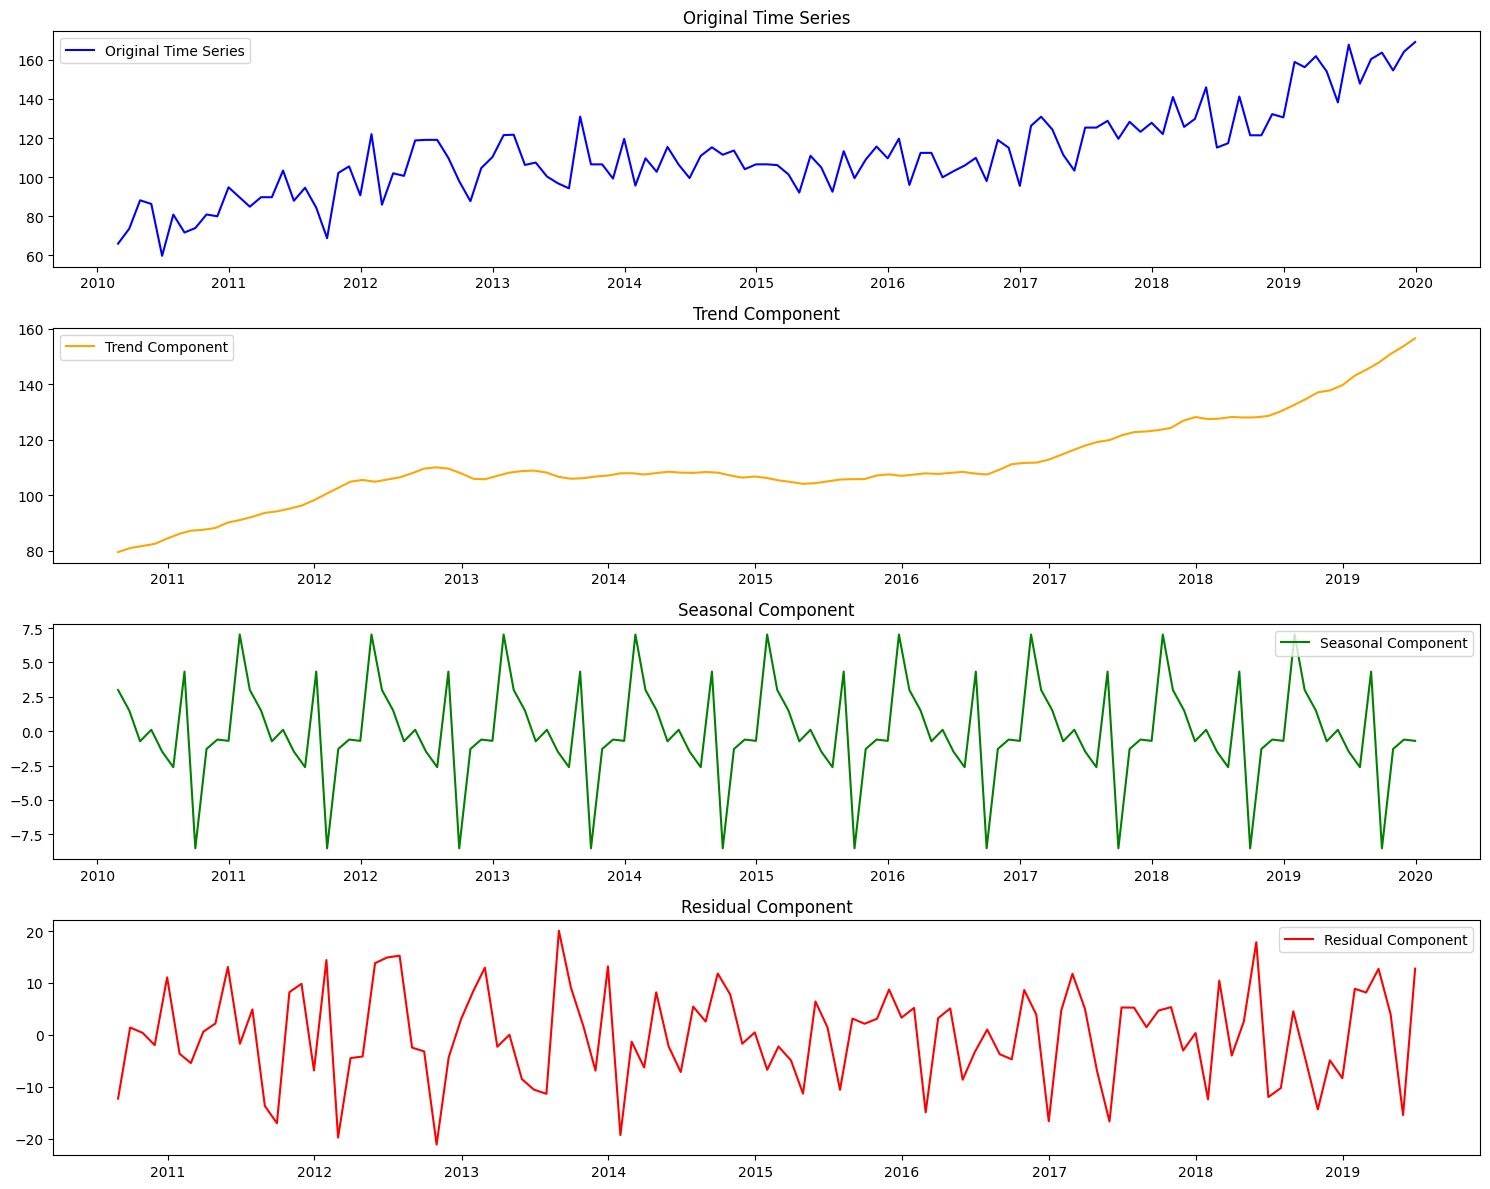

ARIMA MAE: 6.740723562703853, MSE: 86.0571951925383, RMSE: 9.27670174105745, MAPE: nan
SARIMA MAE: 11.684140109331691, MSE: 195.51454887051844, RMSE: 13.982651710978088, MAPE: nan


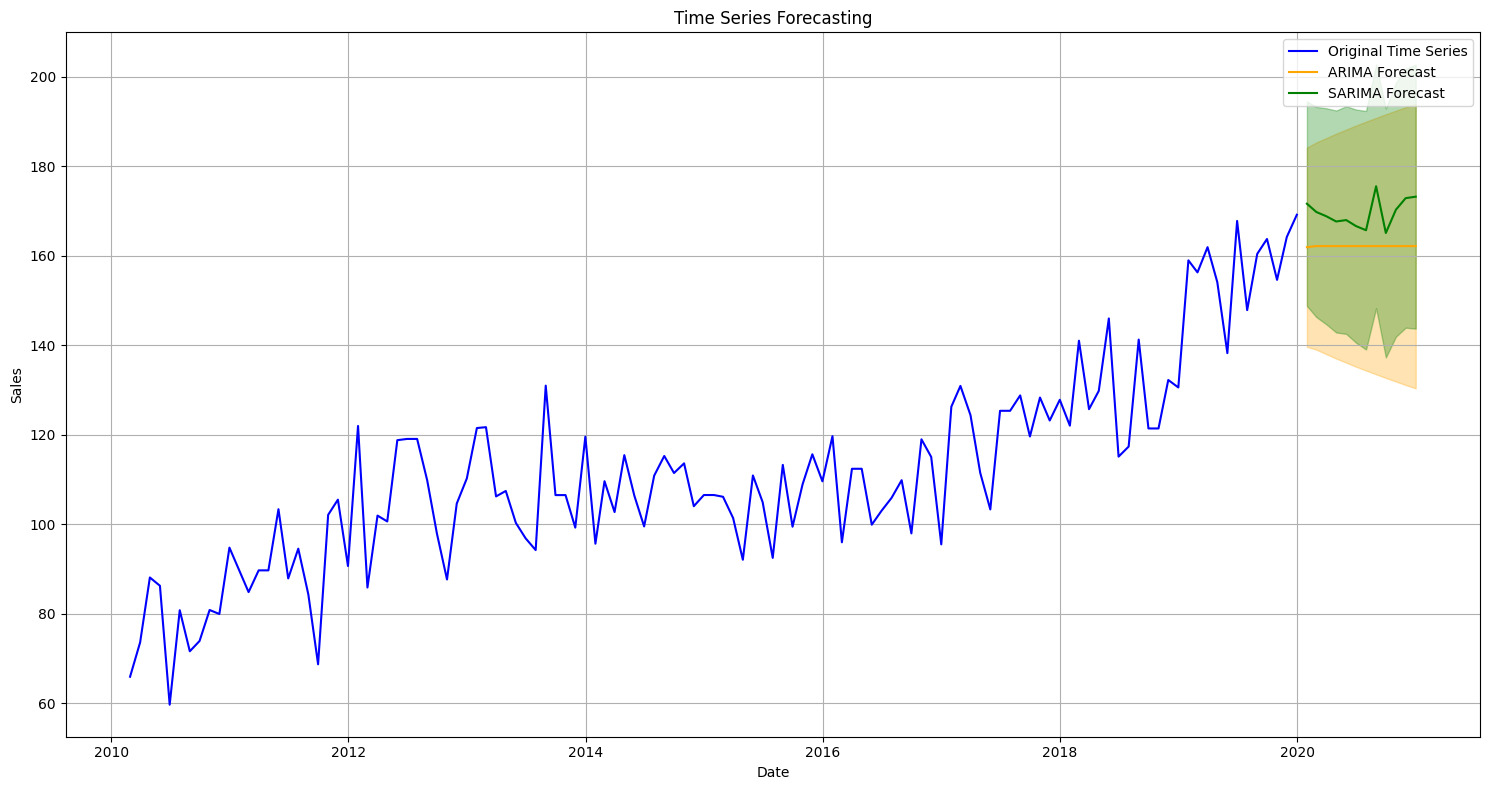

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Load the Data
np.random.seed(0)
date_range = pd.date_range(start='1/1/2010', periods=120, freq='M')
trend = np.linspace(50, 150, 120)  # Linear trend
seasonality = 10 + 20 * np.sin(np.linspace(0, 3.14 * 2, 120))  # Seasonal component
noise = np.random.normal(scale=10, size=120)  # Random noise
data = trend + seasonality + noise
time_series = pd.Series(data, index=date_range)

# Step 2: Preprocess the Data
time_series[::15] = np.nan
time_series = time_series.fillna(method='ffill')
time_series = time_series.dropna()

# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Monthly Sales')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 4: Time Series Decomposition
decomposition = seasonal_decompose(time_series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 12))
plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original Time Series', color='blue')
plt.title('Original Time Series')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Model Building and Forecasting
arima_model = ARIMA(time_series, order=(1, 1, 1))
arima_fit = arima_model.fit()

sarima_model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

arima_forecast = arima_fit.get_forecast(steps=12)
arima_forecast_series = arima_forecast.predicted_mean
arima_forecast_ci = arima_forecast.conf_int()

sarima_forecast = sarima_fit.get_forecast(steps=12)
sarima_forecast_series = sarima_forecast.predicted_mean
sarima_forecast_ci = sarima_forecast.conf_int()

# Step 6: Model Evaluation
actual = time_series[-12:]

arima_mae = mean_absolute_error(actual, arima_forecast_series)
arima_mse = mean_squared_error(actual, arima_forecast_series)
arima_rmse = np.sqrt(arima_mse)
arima_mape = np.mean(np.abs((actual - arima_forecast_series) / actual)) * 100

sarima_mae = mean_absolute_error(actual, sarima_forecast_series)
sarima_mse = mean_squared_error(actual, sarima_forecast_series)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mape = np.mean(np.abs((actual - sarima_forecast_series) / actual)) * 100

print(f"ARIMA MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}, MAPE: {arima_mape}")
print(f"SARIMA MAE: {sarima_mae}, MSE: {sarima_mse}, RMSE: {sarima_rmse}, MAPE: {sarima_mape}")

# Step 7: Plotting the Forecast
plt.figure(figsize=(15, 8))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(arima_forecast_series.index, arima_forecast_series, label='ARIMA Forecast', color='orange')
plt.plot(sarima_forecast_series.index, sarima_forecast_series, label='SARIMA Forecast', color='green')
plt.fill_between(arima_forecast_series.index, arima_forecast_ci.iloc[:, 0], arima_forecast_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.fill_between(sarima_forecast_series.index, sarima_forecast_ci.iloc[:, 0], sarima_forecast_ci.iloc[:, 1], color='green', alpha=0.3)
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/practical_implementation_forecasting.png')
plt.show()